In [1]:
import numpy as np
import matplotlib.pyplot as plt
from distgen import Generator

In [2]:
gen = Generator('base.yaml')

In [3]:
print(gen)

<disgten.Generator with input: 
n_particle: 10000
output:
  type: null
px_dist:
  sigma_px:
    units: megaelectron_volt / speed_of_light
    value: 0.00434
  type: gaussian
py_dist:
  sigma_py:
    units: megaelectron_volt / speed_of_light
    value: 0.00434
  type: gaussian
pz_dist:
  avg_pz:
    units: megaelectron_volt / speed_of_light
    value: 43.4
  sigma_pz:
    units: megaelectron_volt / speed_of_light
    value: 0.00434
  type: gaussian
r_dist:
  sigma_xy:
    units: millimeter
    value: 1.0
  type: radial_gaussian
random_type: pseudo
start:
  type: time
total_charge:
  units: nanocoulomb
  value: 1.0
transforms: null
z_dist:
  avg_z:
    units: millimeter
    value: 0.0
  sigma_z:
    units: millimeter
    value: 1.0
  type: gaussian

>


In [4]:
gen.run()
pg_0 = gen.particles

[]

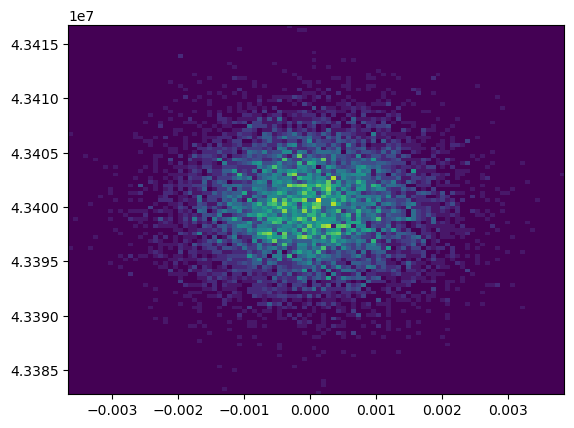

In [5]:
plt.hist2d(pg_0.z, pg_0.pz, bins=100)
plt.plot()

In [6]:
from bmadx.pmd_utils import openpmd_to_bmadx_particles, bmadx_particles_to_openpmd

In [7]:
p0c = 43.4e6
pg_0.drift_to_z(z=0)
bmadx_par_0 = openpmd_to_bmadx_particles(pg_0, p0c)

[]

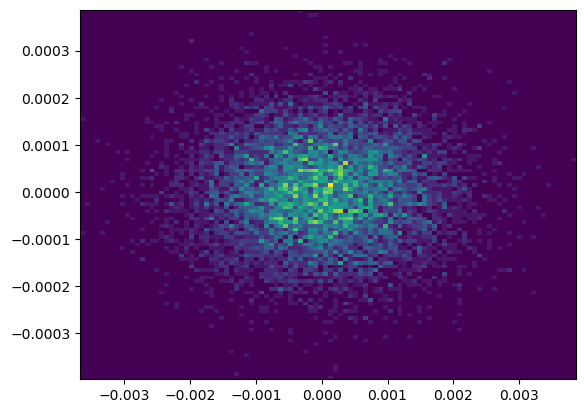

In [8]:
plt.hist2d(bmadx_par_0.z, bmadx_par_0.pz, bins=100)
plt.plot()

In [9]:
import torch
import numpy as np
from bmadx import PI
from bmadx.structures import (
    Drift,
    SBend
)

In [10]:
"""
p0c = 43.4e6
l_bend = 0.3
theta = 20.0 * PI / 180.0
l_arc = l_bend * theta / np.sin(theta)
g = theta / l_arc 

#l_12 = 1.808
#l_23 = 0.991 + 0.72
#l_34 = 1.808
l_initial = 1.0
l_12 = 1.502
l_23 = 1.405
l_34 = 1.502
l_final = 1.0


b1 = SBend(
    L = torch.tensor(l_arc),
    P0C = torch.tensor(p0c),
    G = torch.tensor(-g),
    E1 = torch.tensor(0.0),
    E2 = torch.tensor(-theta),
    FRINGE_AT = "no_end"
)

b2 = SBend(
    L = torch.tensor(l_arc),
    P0C = torch.tensor(p0c),
    G = torch.tensor(g),
    E1 = torch.tensor(theta),
    E2 = torch.tensor(0.0),
    FRINGE_AT = "no_end"
)

b3 = SBend(
    L = torch.tensor(l_arc),
    P0C = torch.tensor(p0c),
    G = torch.tensor(-g),
    E1 = torch.tensor(0.0),
    E2 = torch.tensor(-theta),
    FRINGE_AT = "no_end"
)

b4 = SBend(
    L = torch.tensor(l_arc),
    P0C = torch.tensor(p0c),
    G = torch.tensor(g),
    E1 = torch.tensor(theta),
    E2 = torch.tensor(0.0),
    FRINGE_AT = "no_end"
)

d_initial = Drift(L = torch.tensor(l_initial))
d_12 = Drift(L = torch.tensor(l_12))
d_23 = Drift(L = torch.tensor(l_23))
d_34 = Drift(L = torch.tensor(l_34))
d_final = Drift(L = torch.tensor(l_final))

lattice = [d_initial, b1, d_12, b2, d_23, b3, d_34, b4]
"""


'\np0c = 43.4e6\nl_bend = 0.3\ntheta = 20.0 * PI / 180.0\nl_arc = l_bend * theta / np.sin(theta)\ng = theta / l_arc \n\n#l_12 = 1.808\n#l_23 = 0.991 + 0.72\n#l_34 = 1.808\nl_initial = 1.0\nl_12 = 1.502\nl_23 = 1.405\nl_34 = 1.502\nl_final = 1.0\n\n\nb1 = SBend(\n    L = torch.tensor(l_arc),\n    P0C = torch.tensor(p0c),\n    G = torch.tensor(-g),\n    E1 = torch.tensor(0.0),\n    E2 = torch.tensor(-theta),\n    FRINGE_AT = "no_end"\n)\n\nb2 = SBend(\n    L = torch.tensor(l_arc),\n    P0C = torch.tensor(p0c),\n    G = torch.tensor(g),\n    E1 = torch.tensor(theta),\n    E2 = torch.tensor(0.0),\n    FRINGE_AT = "no_end"\n)\n\nb3 = SBend(\n    L = torch.tensor(l_arc),\n    P0C = torch.tensor(p0c),\n    G = torch.tensor(-g),\n    E1 = torch.tensor(0.0),\n    E2 = torch.tensor(-theta),\n    FRINGE_AT = "no_end"\n)\n\nb4 = SBend(\n    L = torch.tensor(l_arc),\n    P0C = torch.tensor(p0c),\n    G = torch.tensor(g),\n    E1 = torch.tensor(theta),\n    E2 = torch.tensor(0.0),\n    FRINGE_AT = "

In [11]:
# test
p0c = 43.4e6
l_bend = 0.3
theta = 20.0 * PI / 180.0
l_arc = l_bend * theta / np.sin(theta)
g = theta / l_arc 

#l_12 = 1.808
#l_23 = 0.991 + 0.72
#l_34 = 1.808
l_initial = 1.0
l_12 = 1.502
l_23 = 1.405
l_34 = 1.502
l_final = 1.0
def create_drift(L):
    D = np.identity(6)
    D[0,1] = L
    D[2,3] = L
    return D

D1 = create_drift(l_initial)
D12 = create_drift(l_12)
D23 = create_drift(l_23)
D34 = create_drift(l_34)

def create_face(h, beta):
    face = np.identity(6)
    face[1,0] = h*np.tan(beta)
    face[3,2] = -h*np.tan(beta)
    return face

def create_body(L, h, alpha):
    body = np.identity(6)
    C = np.cos(alpha)
    S = np.sin(alpha)
    body[0,0] = C
    body[0,1] = S/h
    body[0,5] = (1-C)/h
    body[1,0] = -h*S
    body[1,1] = C
    body[1,5] = S
    body[2,3] = L
    body[4,0] = S
    body[4,1] = (1-C)/h
    body[4,5] = (alpha-S/h)
    return body

def create_dipole(L, h, alpha, beta1, beta2):
    entrance = create_face(h, beta1)
    body = create_body(L, h, alpha)
    exit = create_face(h, beta2)
    return exit @ body @ entrance

b1 = create_dipole(l_arc, g, theta, 0.0, theta)
b2 = create_dipole(l_arc, -g, theta, -theta, 0.0)
b3 = create_dipole(l_arc, g, theta, 0.0, theta)
b4 = create_dipole(l_arc, -g, theta, -theta, 0.0)
    
R = np.linalg.multi_dot([b4 , D34 , b3 , D23 , b2 , D12 , b1 , D1])
R_55 = R[4, 4]
R_56 = R[4, 5]
R_65 = R[5, 4]
R_66 = R[5, 5]
R_51 = R[4, 0]
R_52 = R[4, 1]

print(f'R 55 = {R_55}')
print(f'R 56 = {R_56}')
print(f'R 65 = {R_65}')
print(f'R 66 = {R_66}')
#print(f'R 51= {R}')

    





R 55 = 1.0
R 56 = 3.6874593340537856
R 65 = 0.0
R 66 = 1.0


In [12]:
avg_z_0_sqrd = (bmadx_par_0.z**2).mean()
avg_pz_0_sqrd = (bmadx_par_0.pz**2).mean()
avg_z_pz_0 = (bmadx_par_0.z * bmadx_par_0.pz).mean()
emittance_0_sqrd = avg_z_0_sqrd * avg_pz_0_sqrd - avg_z_pz_0**2
avg_x_0_sqrd = (bmadx_par_0.x**2).mean()
avg_px_0_sqrd = (bmadx_par_0.px**2).mean()
avg_x_px_0 = (bmadx_par_0.x * bmadx_par_0.px).mean()
emittance_x_0_sqrd = avg_x_0_sqrd * avg_px_0_sqrd - avg_x_px_0**2
print(f'initial <z^2> \t \t {avg_z_0_sqrd}')
print(f'initial bunch length \t {avg_z_0_sqrd**0.5}')
print(f'initial <pz^2> \t \t {avg_pz_0_sqrd}')
print(f'initial <z pz> \t \t {avg_z_pz_0}')
print(f'initial emittance^2 \t {emittance_0_sqrd}')


initial <z^2> 	 	 1.0000000200537597e-06
initial bunch length 	 0.0010000000100268797
initial <pz^2> 	 	 9.999990631411916e-09
initial <z pz> 	 	 -1.0403969072638236e-09
initial emittance^2 	 9.998908406224681e-15


In [13]:
print(R_56)
avg_z_pz_opt  = 1*(- avg_z_0_sqrd / R_56)
avg_pz_sqrd_opt = emittance_0_sqrd / avg_z_0_sqrd + avg_z_0_sqrd / R_56**2
print(f'optimal <z pz>  = {avg_z_pz_opt}')
print(f'optimal <pz^2>  = {avg_pz_sqrd_opt}')
avg_x_px_opt  = 1*(- avg_x_0_sqrd / (R_52/R_51))
avg_px_sqrd_opt = emittance_x_0_sqrd / avg_x_0_sqrd + avg_x_0_sqrd / (R_52/R_51)**2
print(f'optimal <z pz>  = {avg_z_pz_opt}')
print(f'optimal <pz^2>  = {avg_pz_sqrd_opt}')

3.6874593340537856
optimal <z pz>  = -2.711894368078131e-07
optimal <pz^2>  = 8.354261736701997e-08
optimal <z pz>  = -2.711894368078131e-07
optimal <pz^2>  = 8.354261736701997e-08


In [14]:
cov = np.array([[avg_z_0_sqrd, avg_z_pz_opt],[avg_z_pz_opt, avg_pz_sqrd_opt]])
print(f'new emittance sqrd: {np.linalg.det(cov)}')
new_z_pz = np.random.multivariate_normal([0, 0], cov, size=len(bmadx_par_0.z))
new_z_pz.shape

new emittance sqrd: 9.998908406224672e-15


(10000, 2)

In [15]:
cov_x = np.array([[avg_x_0_sqrd, avg_x_px_opt],[avg_x_px_opt, avg_px_sqrd_opt]])
print(f'new x emittance sqrd: {np.linalg.det(cov_x)}')
new_x_px = np.random.multivariate_normal([0, 0], cov_x, size=len(bmadx_par_0.x))
new_x_px.shape

new x emittance sqrd: 9.999574297523317e-15


(10000, 2)

In [16]:
chirped_beam_np = np.stack([new_x_px[:,0], new_x_px[:,1], bmadx_par_0.y, bmadx_par_0.py, new_z_pz[:,0], new_z_pz[:,1]], axis=0)
chirped_beam_np.shape

(6, 10000)

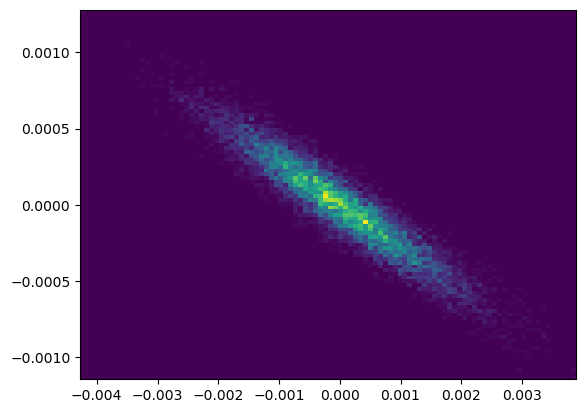

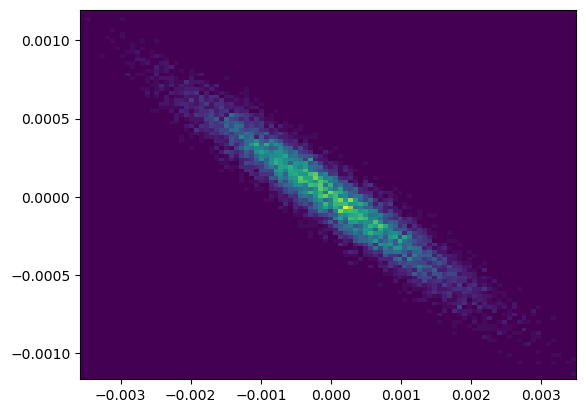

In [33]:
plt.hist2d(chirped_beam_np[4], chirped_beam_np[5], bins=100)
plt.show()
plt.hist2d(chirped_beam_np[0], chirped_beam_np[1], bins=100)
plt.show()

In [18]:
final_beam_np = np.dot(R,chirped_beam_np)

In [19]:
chirped_beam_np[4].std()

0.0010157020733626784

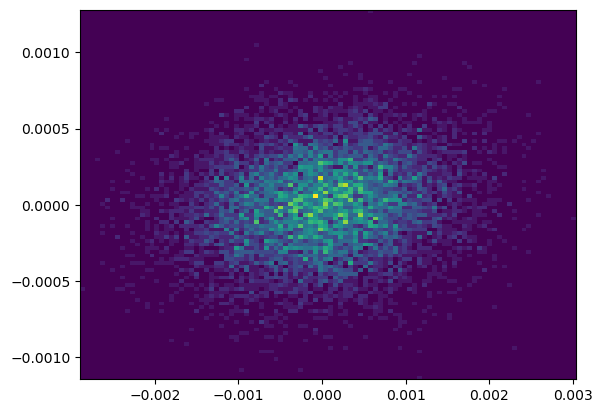

In [20]:
plt.hist2d(final_beam_np[4], final_beam_np[5], bins=100)
plt.show()

In [21]:
final_beam_np[4].std()

0.000828541552209845

In [22]:
zf = chirped_beam_np[4] + chirped_beam_np[5]*R_56
zf.std()

0.0003666259961897494

In [23]:
from bmadx import Particle, M_ELECTRON
chirped_beam_bmadx = Particle(
    x = chirped_beam_np[0],
    px =chirped_beam_np[1],
    y = chirped_beam_np[2],
    py =chirped_beam_np[3],
    z = chirped_beam_np[4],
    pz =chirped_beam_np[5],
    s = 0,
    p0c = p0c,
    mc2 = M_ELECTRON
)

In [24]:
pg_chirped = bmadx_particles_to_openpmd(chirped_beam_bmadx)
pg_chirped.drift_to_t(t=0)

[]

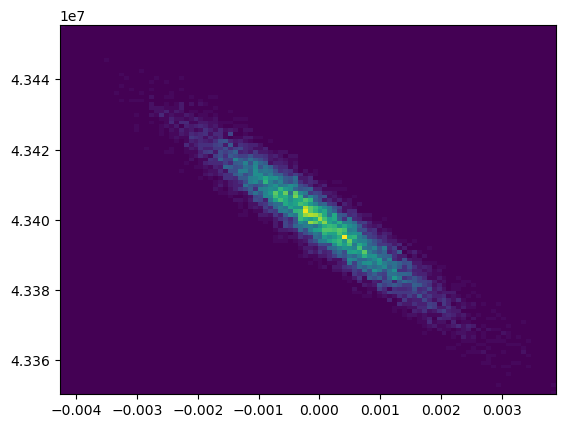

In [25]:
plt.hist2d(pg_chirped.z, pg_chirped.pz, bins=100)
plt.plot()

In [26]:
def write_opal(pg, outfile):
    header = str(len(pg.x))
    data = np.stack([pg.x, pg.px/(M_ELECTRON), pg.y, pg.py/(M_ELECTRON), pg.z, pg.pz/(M_ELECTRON)], axis=-1)
    np.savetxt(outfile, data, header=header, comments='', delimiter='  ')

In [27]:
write_opal(pg_chirped, 'OPAL/initial_beam_1e4_1mm_p1mrad_p1pc_par.data')

In [28]:
'''
# Create single particle
from bmadx import Particle, M_ELECTRON

coords = torch.zeros(6)
s = 0.0
p_in = Particle(
    *coords, 
    s = torch.tensor(s), 
    p0c = torch.tensor(p0c), 
    mc2 = torch.tensor(M_ELECTRON)
)
# Particle is a named tuple with: cannonical coords (x, px, y, py, z, pz), s, p0c, mc2:
p_in
'''

'\n# Create single particle\nfrom bmadx import Particle, M_ELECTRON\n\ncoords = torch.zeros(6)\ns = 0.0\np_in = Particle(\n    *coords, \n    s = torch.tensor(s), \n    p0c = torch.tensor(p0c), \n    mc2 = torch.tensor(M_ELECTRON)\n)\n# Particle is a named tuple with: cannonical coords (x, px, y, py, z, pz), s, p0c, mc2:\np_in\n'

In [29]:
'''
# autodiff Jacobian
from torch.autograd.functional import jacobian
from bmadx import track_lattice, Particle

f_drift = lambda x: track_lattice(Particle(*x, s=p_in.s, p0c=p_in.p0c, mc2=p_in.mc2), lattice)[:6]
coords = torch.zeros(6)
diff_coords = coords.T.clone().detach().requires_grad_(True)
jac = jacobian(f_drift, diff_coords)
jac = torch.vstack(jac)
jac
'''

'\n# autodiff Jacobian\nfrom torch.autograd.functional import jacobian\nfrom bmadx import track_lattice, Particle\n\nf_drift = lambda x: track_lattice(Particle(*x, s=p_in.s, p0c=p_in.p0c, mc2=p_in.mc2), lattice)[:6]\ncoords = torch.zeros(6)\ndiff_coords = coords.T.clone().detach().requires_grad_(True)\njac = jacobian(f_drift, diff_coords)\njac = torch.vstack(jac)\njac\n'

In [30]:
'''
R_55 = jac[4, 4]
R_56 = jac[4, 5]
R_65 = jac[5, 4]
R_66 = jac[5, 5]
print(f'R 55 = {R_55}')
print(f'R 56 = {R_56}')
print(f'R 65 = {R_65}')
print(f'R 66 = {R_66}')
'''

"\nR_55 = jac[4, 4]\nR_56 = jac[4, 5]\nR_65 = jac[5, 4]\nR_66 = jac[5, 5]\nprint(f'R 55 = {R_55}')\nprint(f'R 56 = {R_56}')\nprint(f'R 65 = {R_65}')\nprint(f'R 66 = {R_66}')\n"

In [31]:
"""
chirped_beam = Particle(
    x = bmadx_par_0.x,
    px =bmadx_par_0.px,
    y = bmadx_par_0.y,
    py =bmadx_par_0.py,
    z = new_z_pz[:,0],
    pz =new_z_pz[:,1],
    s = p_in.s.numpy(),
    p0c =p_in.p0c.numpy(),
    mc2 =p_in.mc2.numpy()
)
"""

'\nchirped_beam = Particle(\n    x = bmadx_par_0.x,\n    px =bmadx_par_0.px,\n    y = bmadx_par_0.y,\n    py =bmadx_par_0.py,\n    z = new_z_pz[:,0],\n    pz =new_z_pz[:,1],\n    s = p_in.s.numpy(),\n    p0c =p_in.p0c.numpy(),\n    mc2 =p_in.mc2.numpy()\n)\n'

In [32]:
chirped_avg_z_sqrd = (chirped_beam.z**2).mean()
chirped_avg_pz_sqrd = (chirped_beam.pz**2).mean()
chirped_avg_z_pz = (chirped_beam.z * chirped_beam.pz).mean()
chirped_emittance_sqrd = chirped_avg_z_sqrd * chirped_avg_pz_sqrd - chirped_avg_z_pz**2
print(f'chirped <z^2> \t \t {chirped_avg_z_sqrd}')
print(f'chirped bunch length \t {chirped_avg_z_sqrd**0.5}')
print(f'chirped <pz^2> \t \t {chirped_avg_pz_sqrd}')
print(f'chirped <z pz> \t \t {chirped_avg_z_pz}')
print(f'chirped emittance^2 \t {chirped_emittance_sqrd}')

NameError: name 'chirped_beam' is not defined

In [ ]:
plt.hist2d(chirped_beam.z, chirped_beam.pz, bins=100)
plt.show()

In [ ]:
new_avg_z_pz = (chirped_beam.z*chirped_beam.pz).mean()
print(f'new <z pz> = {new_avg_z_pz}')

In [ ]:
# Track through a lattice saving stats after each element
from bmadx import track_lattice_save_stats

stats = track_lattice_save_stats(chirped_beam, lattice + [d_final]) 
# returns a dictionary with stats after each element

In [ ]:
out_beam = track_lattice(chirped_beam, lattice)

In [ ]:
final_avg_z_sqrd = (out_beam.z**2).mean()
final_avg_pz_sqrd = (out_beam.pz**2).mean()
final_avg_z_pz = (out_beam.z * bmadx_par_0.pz).mean()
final_emittance_sqrd = final_avg_z_sqrd * final_avg_pz_sqrd - final_avg_z_pz**2
print(f'final <z^2> \t \t {final_avg_z_sqrd}')
print(f'final bunch length \t {final_avg_z_sqrd**0.5}')
print(f'final <pz^2> \t \t {final_avg_pz_sqrd}')
print(f'final <z pz> \t \t {final_avg_z_pz}')
print(f'final emittance^2 \t {final_emittance_sqrd}')

In [ ]:
plt.hist2d(out_beam.z, out_beam.pz, bins=100)
plt.plot()

In [ ]:
# Plot x and y beamsize though lattice:

plt.plot(stats['s'], 1e3*np.array(stats['sigma_x']), '.-', label = r'$\sigma_x$')
plt.plot(stats['s'], 1e3*np.array(stats['sigma_y']), '.-', label = r'$\sigma_y$')
plt.plot(stats['s'], 1e3*np.array(stats['sigma_z']), '.-', label = r'$\sigma_z$')
plt.legend()
plt.xlabel(r'$s$ (m)')
plt.ylabel(r'beam size (mm)')

In [ ]:
'''
pg_chirped = bmadx_particles_to_openpmd(chirped_beam)
pg_chirped.drift_to_t(t=0)
'''

In [ ]:
chirped_beam_np = np.stack([chirped_beam.x, chirped_beam.px, chirped_beam.y, chirped_beam.py, chirped_beam.z, chirped_beam.pz], axis=0)
chirped_beam_np.shape

In [ ]:
chirped_beam_np[4].std()

In [ ]:
final_beam_np = R @ chirped_beam_np

In [ ]:
final_beam_np[4].std()

In [ ]:
plt.hist2d(final_beam_np[4], final_beam_np[5], bins=100)
plt.show()